<a href="https://colab.research.google.com/github/Gabikero/C-digo_Maquina/blob/main/Modelos_de_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>MÓDELOS DE CLASIFICACIÓN<center>**

En este proyecto trabajaremos con tres modelos que se aplican en el aprendizaje de maquina para clasificar clases. Regresión logística y Support Vector Machine (SVM)

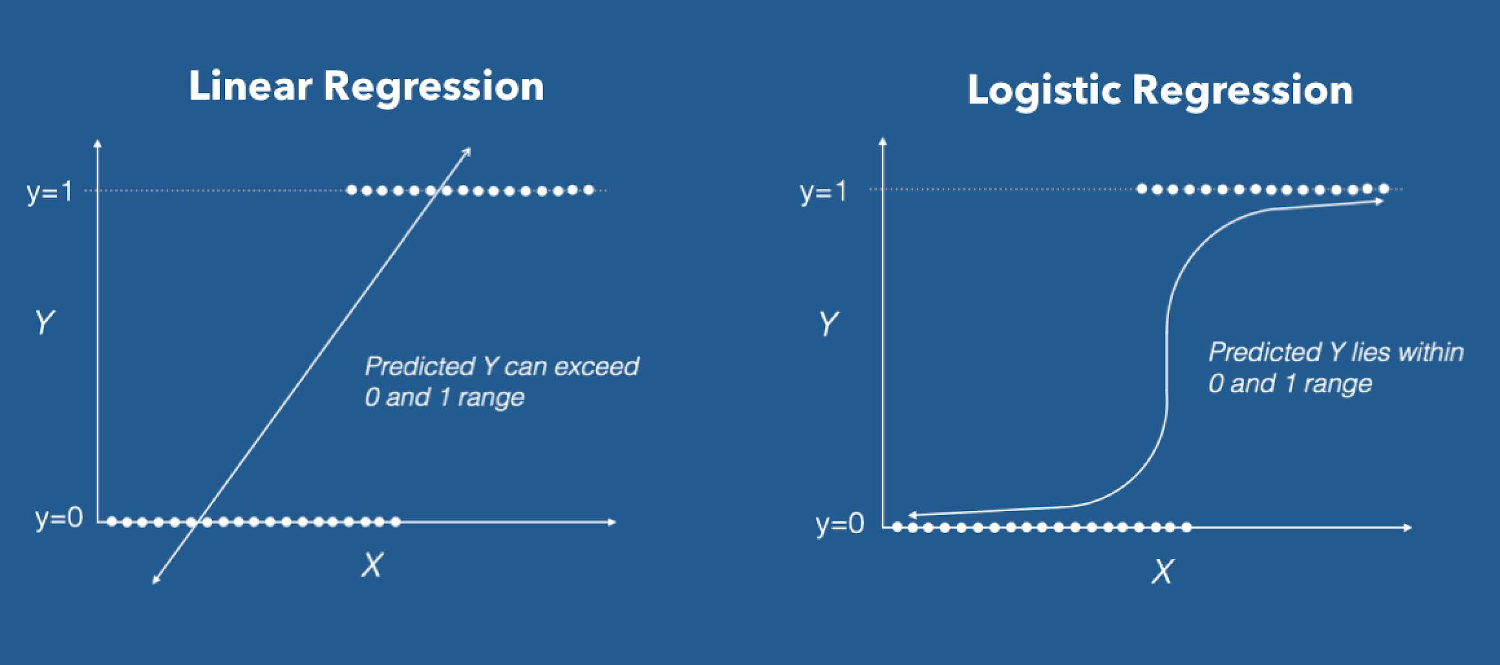

# Modelo Regresión Logistica

In [3]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
!wget -O data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2023-03-04 18:59:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]  35.10K  --.-KB/s    in 0.01s   

2023-03-04 18:59:32 (2.82 MB/s) - ‘data.csv’ saved [35943/35943]



In [6]:
churn= pd.read_csv("/content/drive/MyDrive/Dataset/data.csv")
churn.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [7]:
churn.shape

(200, 28)

In [8]:
churn.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [9]:
churn.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


## Pre_Procesamiento

In [10]:
churn= churn[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']] #Seleccionamos las varaibles a utilizar
churn['churn'] = churn['churn'].astype('int') # Convertimos en números enteros
churn.head()

<ipython-input-10-da2e4a8e27db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['churn'] = churn['churn'].astype('int') # Convertimos en números enteros


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Definimos la matriz X en el conjunto de datos

In [11]:
X = np.asarray(churn[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

## Definimos la matriz objetivo y

In [12]:
y = np.asarray(churn['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

## Normalizamos el Datasets

In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Segmentamos Entrenamiento/Prueba

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) # 20% de los datos son para la prueba
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (160, 7) (160,)
Set de Prueba: (40, 7) (40,)


Verificamos que las dimensiones sean iguales

## Modelamos (Regresión Logistica- Scikit-learn)

In [15]:
#Importamos modulos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [16]:
regresion_l = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
regresion_l

LogisticRegression(C=0.01, solver='liblinear')

## Predecimos

In [17]:
yhat = regresion_l.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

## Estimamos las clases

In [18]:
yhat_prob = regresion_l.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluamos el modelo

coeficiente de similitud de Jaccard

In [19]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

### Matriz de Confunción

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confunción',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión, sin Normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Predicción de etiqueta')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Matriz de Confusión, sin Normalización
[[ 6  9]
 [ 1 24]]


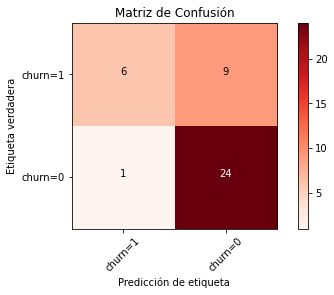

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de Confusión')

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### Log Loss

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

## Probamos con otros datos

In [24]:
regresion_l_1 = LogisticRegression(C=0.03, solver='sag').fit(X_train,y_train)
yhat_1 = regresion_l.predict(X_test)
yhat_prob_1 = regresion_l_1.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob_1))


LogLoss: : 0.59


In [25]:
regresion_2 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat_2 = regresion_2.predict(X_test)
yhat_prob_2 = regresion_2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob_2))

LogLoss: : 0.61


In [26]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2023-03-04 18:59:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2023-03-04 18:59:34 (240 MB/s) - ‘cell_samples.csv’ saved [19975/19975]




# **<h1>Modelo SVM (Support Vector Machines)**

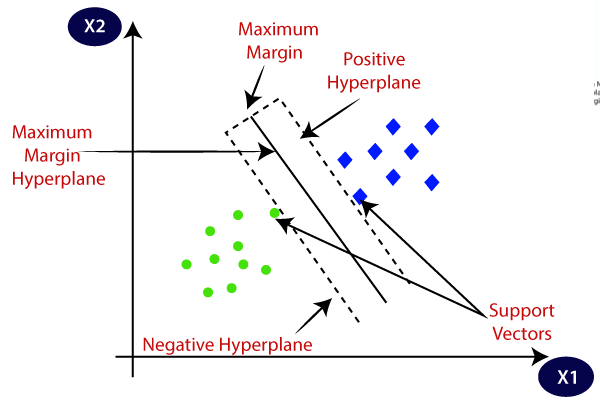

**ID:** 	Clump thickness

**Clump:**	Clump thickness

**UnifSize:**	Uniformity of cell size

**UnifShape:**	Uniformity of cell shape

**MargAdh:**	Marginal adhesion

**SingEpiSize:**	Single epithelial cell size

**BareNuc:**	Bare nuclei

**BlandChrom:**	Bland chromatin

**NormNucl:**	Normal nucleoli

**Mit:** 	Mitoses

**Class:**	Benign or malignant

In [27]:
df_cel= pd.read_csv('/content/drive/MyDrive/Dataset/cell_samples.csv')
df_cel

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


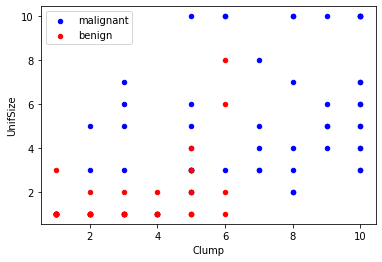

In [30]:
#Ploteamos la variables Clump y UnitSize para la Clasificación de Malignidad y Benignidad
#Clump: Grupo  y UnifSize: Tamaño uniforme
ax = df_cel[df_cel['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Blue', label='malignant')
df_cel[df_cel['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='benign', ax=ax)
plt.show()

Observamos que no gay una separación lineal

## Pre-Procesamiento de Datos

In [31]:
df_cel.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Nos devuelve que los tipos de las variables son:


*   10 varaibles numéricas.
*   1 categoriga "BareNuc (lo cual no es cierto).


In [32]:
# Convertimos BareNuc en int64
df_cel= df_cel[pd.to_numeric(df_cel['BareNuc'], errors='coerce').notnull()]
df_cel['BareNuc'] = df_cel['BareNuc'].astype('int')
df_cel.dtypes

<ipython-input-32-f6034998c28e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cel['BareNuc'] = df_cel['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [34]:
#Armamos la matriz para la varaible independiente con demesiones 5X9
feature_df = df_cel[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [36]:
#Armamos la matrz de la variable dependiente(objetivo)
df_cel['Class'] = df_cel['Class'].astype('int')
y = np.asarray(df_cel['Class'])
y [0:5]

<ipython-input-36-0a88f0e6269d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cel['Class'] = df_cel['Class'].astype('int')


array([2, 2, 2, 2, 2])

## Datos de Entrenamiento/Prueba

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) # 20% de datos para la prueba
print ('Datos de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Datos de Prueba:', X_test.shape,  y_test.shape)

Datos de Entrenamiento: (546, 9) (546,)
Datos de Prueba: (137, 9) (137,)


## **Modelo**

Se utiliza estrategias de transformacion a separación lineal a traves de Kernelling. Se pueden usar dististos funciones Kernel como lineal, sigmoidea, polinomial o función de base radial. Cada una tiene su ecuación específica.

###Kernel RBF

In [38]:
# Usando RBF
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [39]:
# Predecimos usando el modelo
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

#### Evalaución

**Accuracy:** cantidad de veces que acertaste una afirmación, sobre el total de datos de entrada.

**Precision:** cantidad de casos verdaderos positivos sobre la cantidad total de todo lo que dijiste que era positivo.

**Recall:** cantidad de casos clasificados como verdaderos positivos sobre todo lo que realmente era positivo.

**F1-score:** en esta métrica influyen la precisión y el Recall. Es el doble del producto de precision y recall sobre la suma de estos dos

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicta')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matriz de Confusión sin Normalizar
[[85  5]
 [ 0 47]]


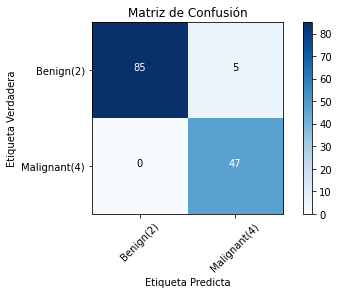

In [43]:
# Calculos de la Matriz de Confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Gráfico de matriz no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Matriz de Confusión')

Muy buenas predeciones para las varaibles

####f1_Score: 

Permite tener lejos los falsos positivos y falsos negativos.

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

#### Jaccard_score

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

### Kernel Lineal

In [50]:
# Usando Kernel
clf_1 = svm.SVC(kernel='linear')
clf_1.fit(X_train, y_train)

yhat_1 = clf_1.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_1,pos_label=2)) 

Avg F1-score: 0.9639
Jaccard score: 0.9444


### Kernel Polinomial

In [52]:
# Usando Kernell: Polinomial
clf_2 = svm.SVC(kernel='poly')
clf_2.fit(X_train, y_train)

yhat_2 = clf_1.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_2,pos_label=2)) 

Avg F1-score: 0.9639
Jaccard score: 0.9444


### Kernel Sigmoide

In [53]:
# Usando Kernell: Sigmoide
clf_3 = svm.SVC(kernel='sigmoid')
clf_3.fit(X_train, y_train)

yhat_3 = clf_3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_3,pos_label=2)) 


Avg F1-score: 0.3715
Jaccard score: 0.3942
